此文件的处理过程处理，具体包括
- EDA
- 还原真实物理值；
- 异常分析处理；
- 更正错误状态标定；
- 输出一个完整的数据data_pro到middle_data文件夹里

后续再用一个文件输出10辆车分别的数据/或者10s，1s数据/充电数据

# 数据字段介绍

![Image Name](http://www.ncbdc.top/photo/20200818/06a6d1fe-c471-4a28-8f1b-28b6edfe01ab.png)

# 导入必要的包

In [1]:
from pd_func import *
#我自己写的常用的一个包的集合
pd.set_option("display.max_rows()",1000)
pd.set_option("display.max_columns()",1000)

# 分充电和放电片段

## 充电过程

### 按照c_stat==1来划分

In [ ]:
data=pd.read_pickle("data_processing_3.pickle")

In [6]:
data.query("c_stat==1")

,vid,status,c_stat,speed,mileage,t_volt,t_current,soc,max_cell_volt,min_cell_volt,max_temp,min_temp,time,flag
593,1,2.0,1.0,0.0,8193.000000,334.299988,-16.400000,55.0,3.730,3.705,11.0,9.0,2018-01-09 14:57:21,2
594,1,2.0,1.0,0.0,8193.000000,334.399994,-17.000000,55.0,3.732,3.706,11.0,9.0,2018-01-09 14:57:31,2
595,1,2.0,1.0,0.0,8193.000000,334.500000,-16.299999,55.0,3.733,3.707,11.0,9.0,2018-01-09 14:57:41,2
596,1,2.0,1.0,0.0,8193.000000,334.600006,-15.200000,55.0,3.734,3.708,11.0,9.0,2018-01-09 14:57:51,2
597,1,2.0,1.0,0.0,8193.000000,334.600006,-16.400000,55.0,3.735,3.709,11.0,9.0,2018-01-09 14:58:01,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14115059,10,2.0,1.0,0.0,28918.300781,379.700012,-0.100000,67.0,3.879,3.855,24.0,22.0,2020-03-18 13:58:48,2
14115945,10,2.0,1.0,0.0,28967.699219,367.799988,-0.100000,55.0,3.760,3.737,27.0,25.0,2020-03-18 16:41:42,2
14115946,10,2.0,1.0,0.0,28967.699219,367.799988,-0.100000,55.0,3.760,3.737,27.0,25.0,2020-03-18 16:42:22,2
14115947,10,2.0,1.0,0.0,28967.699219,367.799988,-0.100000,55.0,3.760,3.737,27.0,25.0,2020-03-18 16:42:42,2


In [7]:
data.query("c_stat==1").groupby("vid").size()

vid
1      415268
2      197604
3      185596
4      505202
5      266707
6      232926
7     2318923
8      334217
9      198046
10        721
dtype: int64

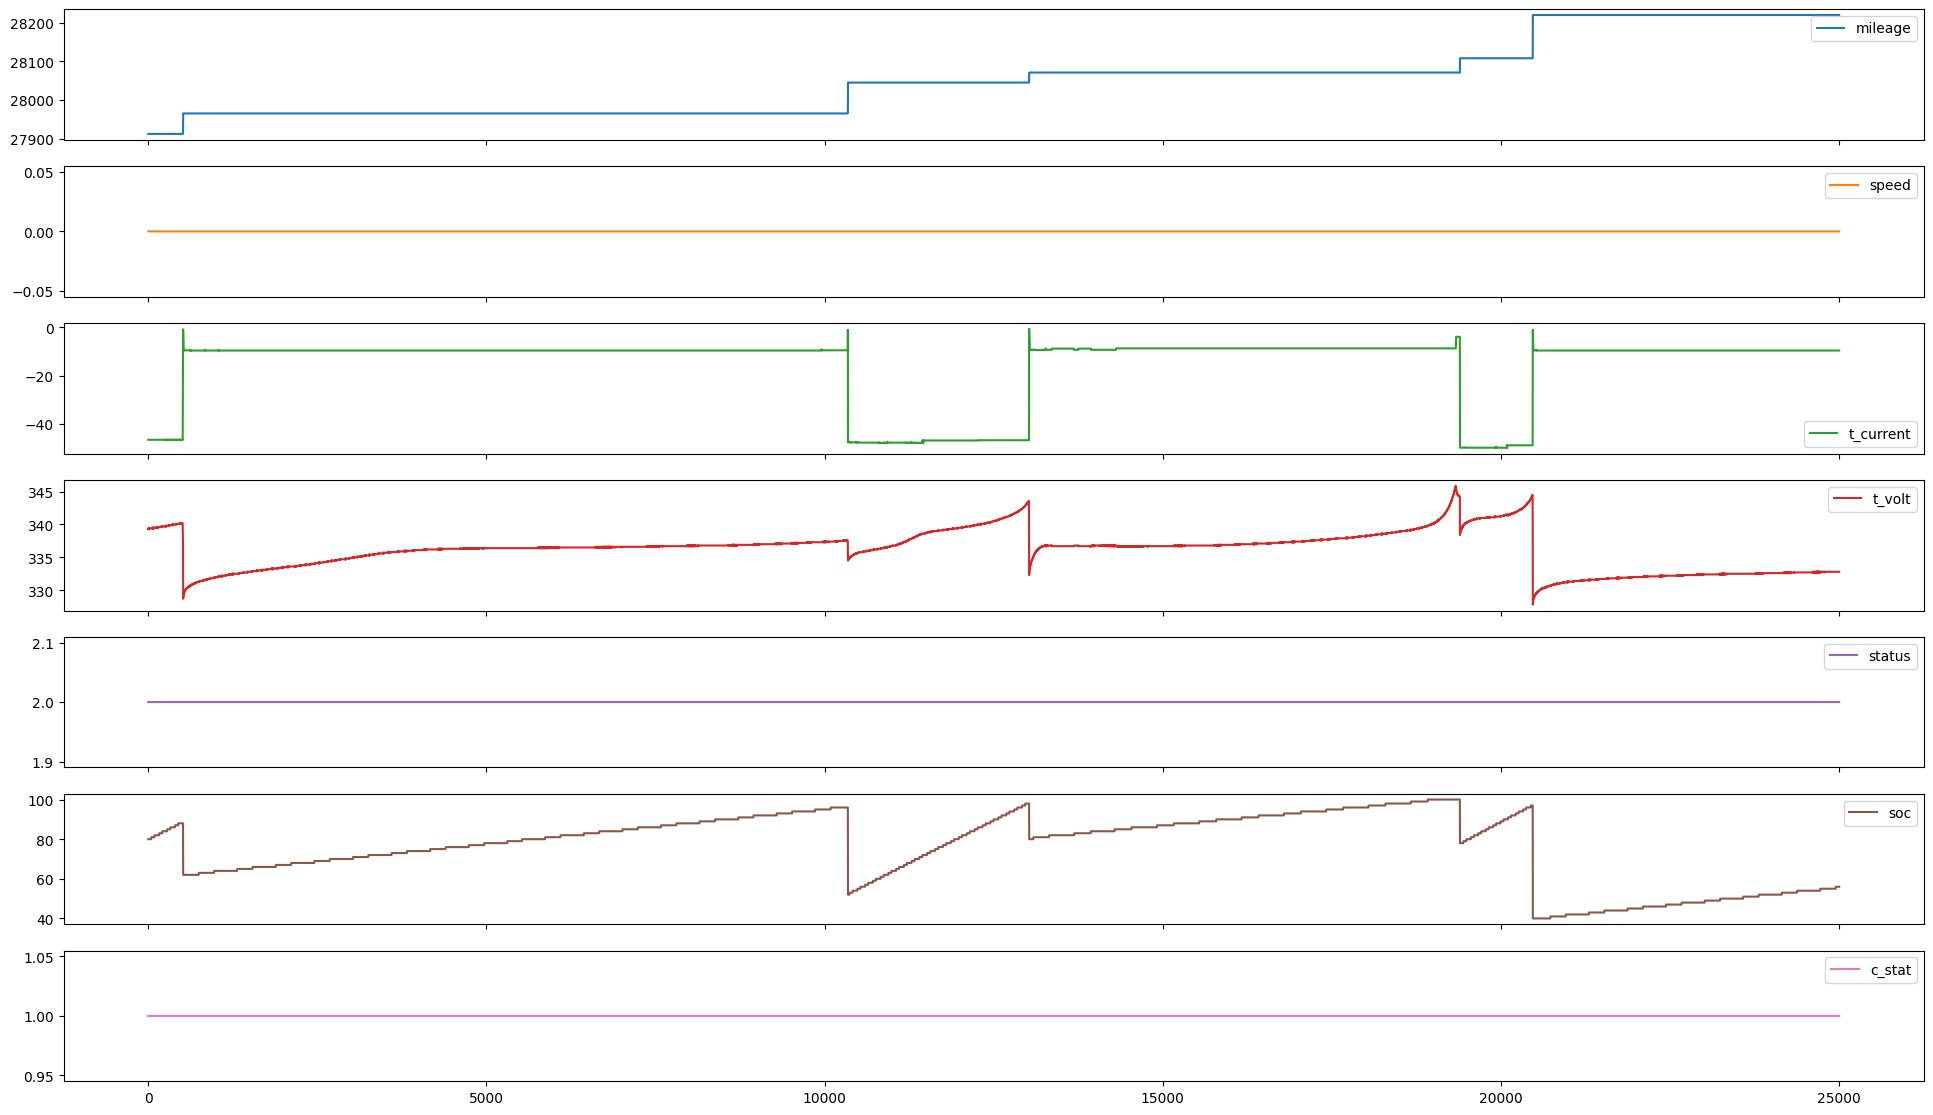

In [171]:
plot_i_without_time(data.query("c_stat==1"),7,random_=True)

> 充电过程
- 1号车 快充和慢充的特点区别很大，，这个可以通过聚类分析过来


### 充电过程分段

新建一个charg_frag,填充数字，用来划分片段，原则是充电过程结束的充电过程开始的soc差别比较大

In [8]:
data["charg_frag"]=-1

In [9]:
charg_index=data.query("c_stat==1").index.to_list()
frag=1
for i in charg_index:
    data.at[i,"charg_frag"]=frag
    if data.at[i+1,"c_stat"]!=1:#如果下一行变成放电过程，fag就加1
        frag+=1   
    if i%100000==0:
        print("完成{}行".format(i))

完成300000行
完成800000行
完成1000000行
完成1200000行
完成2800000行
完成3100000行
完成3200000行
完成3400000行
完成3700000行
完成4400000行
完成4500000行
完成4800000行
完成5000000行
完成5100000行
完成5200000行
完成5300000行
完成5500000行
完成7100000行
完成7400000行
完成7500000行
完成7900000行
完成8000000行
完成8200000行
完成8500000行
完成8800000行
完成9300000行
完成9400000行
完成9600000行
完成9700000行
完成10000000行
完成10200000行
完成10600000行
完成12100000行
完成12200000行
完成12600000行
完成13000000行
完成13200000行
完成13300000行
完成13500000行
完成13600000行
完成13700000行
完成13800000行
完成14100000行


In [12]:
data.query("c_stat==1")

,vid,status,c_stat,speed,mileage,t_volt,t_current,soc,max_cell_volt,min_cell_volt,max_temp,min_temp,time,flag,charg_frag
593,1,2.0,1.0,0.0,8193.000000,334.299988,-16.400000,55.0,3.730,3.705,11.0,9.0,2018-01-09 14:57:21,2,1
594,1,2.0,1.0,0.0,8193.000000,334.399994,-17.000000,55.0,3.732,3.706,11.0,9.0,2018-01-09 14:57:31,2,1
595,1,2.0,1.0,0.0,8193.000000,334.500000,-16.299999,55.0,3.733,3.707,11.0,9.0,2018-01-09 14:57:41,2,1
596,1,2.0,1.0,0.0,8193.000000,334.600006,-15.200000,55.0,3.734,3.708,11.0,9.0,2018-01-09 14:57:51,2,1
597,1,2.0,1.0,0.0,8193.000000,334.600006,-16.400000,55.0,3.735,3.709,11.0,9.0,2018-01-09 14:58:01,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14115059,10,2.0,1.0,0.0,28918.300781,379.700012,-0.100000,67.0,3.879,3.855,24.0,22.0,2020-03-18 13:58:48,2,5926
14115945,10,2.0,1.0,0.0,28967.699219,367.799988,-0.100000,55.0,3.760,3.737,27.0,25.0,2020-03-18 16:41:42,2,5927
14115946,10,2.0,1.0,0.0,28967.699219,367.799988,-0.100000,55.0,3.760,3.737,27.0,25.0,2020-03-18 16:42:22,2,5927
14115947,10,2.0,1.0,0.0,28967.699219,367.799988,-0.100000,55.0,3.760,3.737,27.0,25.0,2020-03-18 16:42:42,2,5927


## 行驶过程

### 按照c_stat!=1来划分

In [4]:
data.query("c_stat!=1")

,vid,status,c_stat,speed,mileage,t_volt,t_current,soc,max_cell_volt,min_cell_volt,max_temp,min_temp,time,flag
0,1,1.0,3.0,0.0,8130.000000,363.899994,3.500000,94.0,4.066,4.025,5.0,4.0,2018-01-08 18:59:59,2
1,1,1.0,3.0,6.7,8130.000000,363.899994,1.600000,94.0,4.061,4.021,5.0,4.0,2018-01-08 19:00:09,2
2,1,1.0,3.0,2.3,8130.000000,363.700012,4.500000,94.0,4.062,4.023,5.0,4.0,2018-01-08 19:00:19,2
3,1,1.0,3.0,0.0,8130.000000,363.899994,2.000000,94.0,4.062,4.023,5.0,4.0,2018-01-08 19:00:29,2
4,1,1.0,3.0,13.0,8130.000000,363.799988,1.500000,94.0,4.061,4.021,5.0,4.0,2018-01-08 19:00:39,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14116116,10,1.0,3.0,8.6,28975.000000,365.600006,15.800000,54.0,3.738,3.718,27.0,25.0,2020-03-18 17:34:36,2
14116117,10,1.0,3.0,22.1,28975.099609,365.399994,17.700001,54.0,3.735,3.715,27.0,25.0,2020-03-18 17:34:46,2
14116118,10,1.0,3.0,12.6,28975.099609,366.200012,1.500000,54.0,3.743,3.724,27.0,25.0,2020-03-18 17:34:56,2
14116119,10,1.0,3.0,29.5,28975.199219,365.200012,15.700000,54.0,3.734,3.715,27.0,25.0,2020-03-18 17:35:06,2


In [5]:
data.query("c_stat!=1").groupby("vid").size()

vid
1     1152229
2     1263923
3      152188
4      708273
5      153409
6      147838
7     5482700
8      259261
9      134369
10       6721
dtype: int64

In [10]:
plot_i_without_time(data.query("c_stat!=1"),1,random_=True)

NameError: name 'plot_i_without_time' is not defined

放电过程中，很多时候结束的时候有熄火，但不是所有的状态都是这样

### 放电过程分段

新建一个charg_frag,填充数字，用来划分片段，原则是放电过程结束的充电过程开始的soc差别比较大

In [33]:
data

,vid,status,c_stat,speed,mileage,t_volt,t_current,soc,max_cell_volt,min_cell_volt,max_temp,min_temp,time,flag
0,1,1.0,3.0,0.0,8130.000000,363.899994,3.500000,94.0,4.066,4.025,5.0,4.0,2018-01-08 18:59:59,2
1,1,1.0,3.0,6.7,8130.000000,363.899994,1.600000,94.0,4.061,4.021,5.0,4.0,2018-01-08 19:00:09,2
2,1,1.0,3.0,2.3,8130.000000,363.700012,4.500000,94.0,4.062,4.023,5.0,4.0,2018-01-08 19:00:19,2
3,1,1.0,3.0,0.0,8130.000000,363.899994,2.000000,94.0,4.062,4.023,5.0,4.0,2018-01-08 19:00:29,2
4,1,1.0,3.0,13.0,8130.000000,363.799988,1.500000,94.0,4.061,4.021,5.0,4.0,2018-01-08 19:00:39,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14116116,10,1.0,3.0,8.6,28975.000000,365.600006,15.800000,54.0,3.738,3.718,27.0,25.0,2020-03-18 17:34:36,2
14116117,10,1.0,3.0,22.1,28975.099609,365.399994,17.700001,54.0,3.735,3.715,27.0,25.0,2020-03-18 17:34:46,2
14116118,10,1.0,3.0,12.6,28975.099609,366.200012,1.500000,54.0,3.743,3.724,27.0,25.0,2020-03-18 17:34:56,2
14116119,10,1.0,3.0,29.5,28975.199219,365.200012,15.700000,54.0,3.734,3.715,27.0,25.0,2020-03-18 17:35:06,2


In [34]:
data["run_frag"]=-1

frag=1
data_res=pd.DataFrame()
for j in range(1,11):
    data_j=data[data["vid"]==j]

    run_index=data_j.query("c_stat!=1").index.to_list()

    for i in run_index[0:-1]:
        data_j.at[i,"run_frag"]=frag
        if data_j.at[i+1,"c_stat"]==1:#如果下一行变成充电过程，fag就加1
            frag+=1   
        if i%100000==0:
            print("完成{}行".format(i))
    i=run_index[-1]
    data_j.at[i,"run_frag"]=frag
    frag+=1
    data_res=pd.concat([data_res,data_j],axis=0)
    print("{}行".format(j))


In [36]:
frag=1
for j in range(1,11):
    data_j=data[data["vid"]==j]
    run_index=data_j.query("c_stat!=1").index.to_list()
    for i in run_index[0:-1]:
        data.at[i,"run_frag"]=frag
        if data_j.at[i+1,"c_stat"]==1:#如果下一行变成充电过程，frag就加1
            frag+=1   
        if i%100000==0:
            print("完成{}行".format(i))
    i=run_index[-1]
    data.at[i,"run_frag"]=frag
    frag+=1#每一辆车结束要递增1（即使递增多了一个1也没事情，后面会消除空值，但是不能共享一个）
    print("完成{}车".format(j))

完成0行
完成100000行
完成200000行
完成400000行
完成500000行
完成600000行
完成700000行
完成900000行
完成1100000行
完成1300000行
完成1400000行
完成1500000行
完成1车
完成1600000行
完成1700000行
完成1800000行
完成1900000行
完成2000000行
完成2100000行
完成2200000行
完成2300000行
完成2400000行
完成2500000行
完成2600000行
完成2700000行
完成2900000行
完成3000000行
完成2车
完成3300000行
完成3车
完成3500000行
完成3600000行
完成3800000行
完成3900000行
完成4000000行
完成4100000行
完成4200000行
完成4300000行
完成4车
完成4600000行
完成4700000行
完成4900000行
完成5车
完成6车
完成5400000行
完成5600000行
完成5700000行
完成5800000行
完成5900000行
完成6000000行
完成6100000行
完成6200000行
完成6300000行
完成6400000行
完成6500000行
完成6600000行
完成6700000行
完成6800000行
完成6900000行
完成7000000行
完成7200000行
完成7300000行
完成7600000行
完成7700000行
完成7800000行
完成8100000行
完成8300000行
完成8400000行
完成8600000行
完成8700000行
完成8900000行
完成9000000行
完成9100000行
完成9200000行
完成9500000行
完成9800000行
完成9900000行
完成10100000行
完成10300000行
完成10400000行
完成10500000行
完成10700000行
完成10800000行
完成10900000行
完成11000000行
完成11100000行
完成11200000行
完成11300000行
完成11400000行
完成11500000行
完成11600000行
完成11700000行
完成11800000行
完成11900000

In [37]:
data.query("c_stat!=1")

,vid,status,c_stat,speed,mileage,t_volt,t_current,soc,max_cell_volt,min_cell_volt,max_temp,min_temp,time,flag,run_frag
0,1,1.0,3.0,0.0,8130.000000,363.899994,3.500000,94.0,4.066,4.025,5.0,4.0,2018-01-08 18:59:59,2,1
1,1,1.0,3.0,6.7,8130.000000,363.899994,1.600000,94.0,4.061,4.021,5.0,4.0,2018-01-08 19:00:09,2,1
2,1,1.0,3.0,2.3,8130.000000,363.700012,4.500000,94.0,4.062,4.023,5.0,4.0,2018-01-08 19:00:19,2,1
3,1,1.0,3.0,0.0,8130.000000,363.899994,2.000000,94.0,4.062,4.023,5.0,4.0,2018-01-08 19:00:29,2,1
4,1,1.0,3.0,13.0,8130.000000,363.799988,1.500000,94.0,4.061,4.021,5.0,4.0,2018-01-08 19:00:39,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14116116,10,1.0,3.0,8.6,28975.000000,365.600006,15.800000,54.0,3.738,3.718,27.0,25.0,2020-03-18 17:34:36,2,5931
14116117,10,1.0,3.0,22.1,28975.099609,365.399994,17.700001,54.0,3.735,3.715,27.0,25.0,2020-03-18 17:34:46,2,5931
14116118,10,1.0,3.0,12.6,28975.099609,366.200012,1.500000,54.0,3.743,3.724,27.0,25.0,2020-03-18 17:34:56,2,5931
14116119,10,1.0,3.0,29.5,28975.199219,365.200012,15.700000,54.0,3.734,3.715,27.0,25.0,2020-03-18 17:35:06,2,5931


del data["pdate"]

In [38]:
del data["flag"]

# 从划分过的片段中，选取分辨率足够的数据

In [39]:
data

,vid,status,c_stat,speed,mileage,t_volt,t_current,soc,max_cell_volt,min_cell_volt,max_temp,min_temp,time,run_frag
0,1,1.0,3.0,0.0,8130.000000,363.899994,3.500000,94.0,4.066,4.025,5.0,4.0,2018-01-08 18:59:59,1
1,1,1.0,3.0,6.7,8130.000000,363.899994,1.600000,94.0,4.061,4.021,5.0,4.0,2018-01-08 19:00:09,1
2,1,1.0,3.0,2.3,8130.000000,363.700012,4.500000,94.0,4.062,4.023,5.0,4.0,2018-01-08 19:00:19,1
3,1,1.0,3.0,0.0,8130.000000,363.899994,2.000000,94.0,4.062,4.023,5.0,4.0,2018-01-08 19:00:29,1
4,1,1.0,3.0,13.0,8130.000000,363.799988,1.500000,94.0,4.061,4.021,5.0,4.0,2018-01-08 19:00:39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14116116,10,1.0,3.0,8.6,28975.000000,365.600006,15.800000,54.0,3.738,3.718,27.0,25.0,2020-03-18 17:34:36,5931
14116117,10,1.0,3.0,22.1,28975.099609,365.399994,17.700001,54.0,3.735,3.715,27.0,25.0,2020-03-18 17:34:46,5931
14116118,10,1.0,3.0,12.6,28975.099609,366.200012,1.500000,54.0,3.743,3.724,27.0,25.0,2020-03-18 17:34:56,5931
14116119,10,1.0,3.0,29.5,28975.199219,365.200012,15.700000,54.0,3.734,3.715,27.0,25.0,2020-03-18 17:35:06,5931


In [40]:
pd.set_option("display.max_rows()",6000)

In [41]:
data.query("c_stat!=1").groupby(by=["vid","run_frag"]).size()

vid  run_frag
1    1             593
     2             897
     3            1564
     4             502
     5            1349
     6             108
     7             383
     8            1270
     9             994
     10            554
     11           2494
     12            745
     13           1015
     14           1204
     15           2527
     16            180
     17            238
     18            176
     19            802
     20            456
     21           1355
     22            666
     23            949
     24           1109
     25            765
     26             38
     27            635
     28            709
     29           1136
     30            955
     31              2
     32            365
     33              1
     34              1
     35           1912
     36            449
     37           1341
     38            545
     39            391
     40             33
     41            417
     42            385
     43           11

In [42]:
data.query("c_stat!=1")["run_frag"].value_counts()

4294    25196
4092    24462
4165    24218
4076    23613
4135    23011
3984    21848
4285    21781
4181    21284
4274    21175
3887    20971
4127    20621
4157    20284
4155    20251
4281    20167
4169    19952
4166    19686
4519    19647
4276    19626
3989    19194
3968    19077
4197    19060
4394    18923
4381    18888
4006    18347
4311    18238
1935    18193
1140    18124
4162    18082
4015    18003
4295    17922
4246    17841
3931    17838
4278    17769
4306    17656
4251    17627
3916    17624
4139    17622
4105    17517
4230    17499
4309    17456
4164    17429
4289    17412
4137    17348
4128    17274
4378    17180
4124    17178
3898    17156
4176    16983
3888    16977
4177    16948
3975    16859
4506    16705
3901    16692
4014    16687
4086    16682
4401    16655
3995    16576
4416    16526
4253    16498
4291    16484
4422    16339
4242    16329
4228    16260
4180    16241
4154    16199
4093    16121
4061    16113
4431    16076
4187    16059
4252    16044
4158    16038
4121  

In [43]:
data.query("run_frag==3091")

,vid,status,c_stat,speed,mileage,t_volt,t_current,soc,max_cell_volt,min_cell_volt,max_temp,min_temp,time,run_frag
4922288,5,1.0,2.0,24.799999,42241.0,387.700012,-13.200000,90.0,4.042,4.035,29.0,28.0,2019-09-04 22:04:02,3091
4922289,5,1.0,3.0,3.500000,42241.0,386.700012,5.300000,90.0,4.034,4.027,29.0,28.0,2019-09-04 22:04:32,3091
4922290,5,1.0,2.0,32.599998,42242.0,387.000000,-4.300000,90.0,4.034,4.026,29.0,28.0,2019-09-04 22:05:01,3091
4922291,5,1.0,3.0,0.000000,42242.0,387.000000,1.700000,90.0,4.035,4.027,29.0,28.0,2019-09-04 22:05:32,3091
4922292,5,1.0,3.0,0.000000,42242.0,387.000000,1.700000,90.0,4.035,4.027,29.0,28.0,2019-09-04 22:06:02,3091
4922293,5,1.0,3.0,13.500000,42242.0,386.200012,15.200000,90.0,4.029,4.021,29.0,28.0,2019-09-04 22:06:31,3091
4922294,5,1.0,3.0,13.800000,42242.0,385.500000,24.900000,90.0,4.021,4.014,29.0,28.0,2019-09-04 22:07:01,3091
4922295,5,1.0,3.0,7.100000,42242.0,386.200012,7.300000,90.0,4.027,4.019,29.0,28.0,2019-09-04 22:07:32,3091
4922296,5,1.0,3.0,8.200000,42242.0,386.500000,2.600000,90.0,4.030,4.022,29.0,28.0,2019-09-04 22:08:02,3091
4922297,5,1.0,2.0,15.300000,42242.0,386.700012,-1.700000,90.0,4.030,4.024,29.0,28.0,2019-09-04 22:08:32,3091


In [44]:
data.query("run_frag==121")

,vid,status,c_stat,speed,mileage,t_volt,t_current,soc,max_cell_volt,min_cell_volt,max_temp,min_temp,time,run_frag
170825,1,2.0,3.0,0.000000,18806.0,350.100006,2.600000,79.0,3.914,3.866,25.0,23.0,2018-05-04 00:40:30,121
170826,1,1.0,3.0,1.500000,18806.0,350.000000,2.300000,79.0,3.914,3.865,25.0,23.0,2018-05-04 00:40:40,121
170827,1,1.0,3.0,0.000000,18806.0,350.000000,2.700000,79.0,3.914,3.865,25.0,23.0,2018-05-04 00:40:50,121
170828,1,1.0,3.0,1.700000,18806.0,350.000000,2.800000,79.0,3.913,3.865,25.0,23.0,2018-05-04 00:41:00,121
170829,1,1.0,3.0,0.000000,18806.0,349.899994,2.600000,79.0,3.913,3.865,25.0,23.0,2018-05-04 00:41:10,121
170830,1,1.0,3.0,0.000000,18806.0,349.899994,1.800000,79.0,3.913,3.865,25.0,23.0,2018-05-04 00:41:20,121
170831,1,1.0,3.0,0.000000,18806.0,349.799988,3.700000,79.0,3.913,3.865,25.0,23.0,2018-05-04 00:41:30,121
170832,1,1.0,3.0,5.600000,18806.0,349.700012,4.200000,79.0,3.912,3.865,25.0,23.0,2018-05-04 00:41:40,121
170833,1,1.0,3.0,6.100000,18806.0,349.899994,1.600000,79.0,3.912,3.865,25.0,23.0,2018-05-04 00:41:50,121
170834,1,1.0,3.0,0.000000,18806.0,349.899994,1.700000,79.0,3.912,3.865,25.0,23.0,2018-05-04 00:42:00,121


In [45]:
data.query("run_frag==122")

,vid,status,c_stat,speed,mileage,t_volt,t_current,soc,max_cell_volt,min_cell_volt,max_temp,min_temp,time,run_frag
172345,1,1.0,3.0,0.000000,18891.0,355.700012,1.300000,83.0,3.978,3.927,26.0,24.0,2018-05-04 06:29:06,122
172346,1,1.0,3.0,0.000000,18891.0,355.700012,1.000000,83.0,3.978,3.926,26.0,24.0,2018-05-04 06:29:16,122
172347,1,1.0,3.0,0.000000,18891.0,355.700012,1.100000,83.0,3.978,3.925,26.0,24.0,2018-05-04 06:29:26,122
172348,1,1.0,3.0,1.300000,18891.0,355.700012,1.500000,83.0,3.978,3.925,26.0,24.0,2018-05-04 06:29:36,122
172349,1,1.0,3.0,1.400000,18891.0,355.600006,2.500000,83.0,3.978,3.925,26.0,24.0,2018-05-04 06:29:46,122
172350,1,1.0,3.0,1.000000,18891.0,355.600006,1.900000,83.0,3.978,3.925,26.0,24.0,2018-05-04 06:29:56,122
172351,1,1.0,3.0,0.000000,18891.0,355.700012,1.400000,83.0,3.978,3.925,26.0,24.0,2018-05-04 06:30:06,122
172352,1,1.0,3.0,0.000000,18891.0,355.700012,1.100000,83.0,3.978,3.925,26.0,24.0,2018-05-04 06:30:16,122
172353,1,1.0,3.0,2.700000,18891.0,355.500000,2.300000,83.0,3.978,3.925,26.0,24.0,2018-05-04 06:30:26,122
172354,1,1.0,3.0,5.300000,18891.0,355.399994,3.800000,83.0,3.977,3.925,26.0,24.0,2018-05-04 06:30:36,122


In [46]:
data.query("run_frag==123")

,vid,status,c_stat,speed,mileage,t_volt,t_current,soc,max_cell_volt,min_cell_volt,max_temp,min_temp,time,run_frag
173399,1,2.0,3.0,0.0,18944.0,350.399994,0.8,79.0,3.92,3.872,28.0,26.0,2018-05-04 10:19:24,123


In [47]:
data.query("run_frag==124")

,vid,status,c_stat,speed,mileage,t_volt,t_current,soc,max_cell_volt,min_cell_volt,max_temp,min_temp,time,run_frag
173435,1,1.0,3.0,0.0,18944.0,357.299988,3.6,87.0,3.998,3.945,28.0,26.0,2018-05-04 10:30:14,124
173436,1,1.0,3.0,1.8,18944.0,357.200012,2.3,87.0,3.997,3.945,28.0,26.0,2018-05-04 10:30:24,124
173437,1,1.0,3.0,1.5,18944.0,357.299988,2.7,87.0,3.997,3.945,28.0,26.0,2018-05-04 10:30:34,124
173438,1,1.0,3.0,1.0,18944.0,357.399994,1.3,87.0,3.997,3.944,28.0,26.0,2018-05-04 10:30:44,124
173439,1,1.0,3.0,0.0,18944.0,357.299988,1.7,87.0,3.997,3.944,28.0,26.0,2018-05-04 10:30:54,124
173440,1,1.0,3.0,2.9,18944.0,357.200012,3.5,87.0,3.997,3.944,28.0,26.0,2018-05-04 10:31:04,124
173441,1,1.0,3.0,3.2,18944.0,357.200012,3.2,87.0,3.997,3.944,28.0,26.0,2018-05-04 10:31:14,124
173442,1,1.0,3.0,0.0,18944.0,357.299988,0.7,87.0,3.997,3.944,28.0,26.0,2018-05-04 10:31:24,124
173443,1,1.0,3.0,2.6,18944.0,357.200012,2.8,87.0,3.997,3.943,28.0,26.0,2018-05-04 10:31:34,124
173444,1,1.0,3.0,1.5,18944.0,357.299988,1.7,87.0,3.995,3.943,28.0,26.0,2018-05-04 10:31:44,124


## 放电片段（能耗预测和续驶里程过程用）

In [53]:
value_counts=data.query("c_stat!=1")["run_frag"].value_counts()

In [54]:
run_index_list=value_counts[value_counts>120].index.to_list()

data_run=data.loc[(data["run_frag"].isin(run_index_list))]

In [56]:
data_run

,vid,status,c_stat,speed,mileage,t_volt,t_current,soc,max_cell_volt,min_cell_volt,max_temp,min_temp,time,run_frag
0,1,1.0,3.0,0.0,8130.000000,363.899994,3.500000,94.0,4.066,4.025,5.0,4.0,2018-01-08 18:59:59,1
1,1,1.0,3.0,6.7,8130.000000,363.899994,1.600000,94.0,4.061,4.021,5.0,4.0,2018-01-08 19:00:09,1
2,1,1.0,3.0,2.3,8130.000000,363.700012,4.500000,94.0,4.062,4.023,5.0,4.0,2018-01-08 19:00:19,1
3,1,1.0,3.0,0.0,8130.000000,363.899994,2.000000,94.0,4.062,4.023,5.0,4.0,2018-01-08 19:00:29,1
4,1,1.0,3.0,13.0,8130.000000,363.799988,1.500000,94.0,4.061,4.021,5.0,4.0,2018-01-08 19:00:39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14116116,10,1.0,3.0,8.6,28975.000000,365.600006,15.800000,54.0,3.738,3.718,27.0,25.0,2020-03-18 17:34:36,5931
14116117,10,1.0,3.0,22.1,28975.099609,365.399994,17.700001,54.0,3.735,3.715,27.0,25.0,2020-03-18 17:34:46,5931
14116118,10,1.0,3.0,12.6,28975.099609,366.200012,1.500000,54.0,3.743,3.724,27.0,25.0,2020-03-18 17:34:56,5931
14116119,10,1.0,3.0,29.5,28975.199219,365.200012,15.700000,54.0,3.734,3.715,27.0,25.0,2020-03-18 17:35:06,5931


In [57]:
len(data_run["run_frag"].value_counts())

3527

In [58]:
data_run

,vid,status,c_stat,speed,mileage,t_volt,t_current,soc,max_cell_volt,min_cell_volt,max_temp,min_temp,time,run_frag
0,1,1.0,3.0,0.0,8130.000000,363.899994,3.500000,94.0,4.066,4.025,5.0,4.0,2018-01-08 18:59:59,1
1,1,1.0,3.0,6.7,8130.000000,363.899994,1.600000,94.0,4.061,4.021,5.0,4.0,2018-01-08 19:00:09,1
2,1,1.0,3.0,2.3,8130.000000,363.700012,4.500000,94.0,4.062,4.023,5.0,4.0,2018-01-08 19:00:19,1
3,1,1.0,3.0,0.0,8130.000000,363.899994,2.000000,94.0,4.062,4.023,5.0,4.0,2018-01-08 19:00:29,1
4,1,1.0,3.0,13.0,8130.000000,363.799988,1.500000,94.0,4.061,4.021,5.0,4.0,2018-01-08 19:00:39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14116116,10,1.0,3.0,8.6,28975.000000,365.600006,15.800000,54.0,3.738,3.718,27.0,25.0,2020-03-18 17:34:36,5931
14116117,10,1.0,3.0,22.1,28975.099609,365.399994,17.700001,54.0,3.735,3.715,27.0,25.0,2020-03-18 17:34:46,5931
14116118,10,1.0,3.0,12.6,28975.099609,366.200012,1.500000,54.0,3.743,3.724,27.0,25.0,2020-03-18 17:34:56,5931
14116119,10,1.0,3.0,29.5,28975.199219,365.200012,15.700000,54.0,3.734,3.715,27.0,25.0,2020-03-18 17:35:06,5931


## 备份数据

In [59]:
data_run.to_pickle("data_run.pickle")

9460911 

## 充电过程（SOH研究过程用）

- 先可视化放电过程，看变化
- 建立某些特征，分析数据，比如每一段中的时间间隔，
- 有很多充电过程是可以合并的,来源于充电过程中偶尔会变换状态

In [184]:
charg_frag_value=data.query("c_stat==1")["charg_frag"].value_counts()

In [185]:
charg_frag_value[charg_frag_value<60]

2986    59
741     59
3069    59
3177    59
234     59
        ..
1349     1
1825     1
2019     1
1698     1
2037     1
Name: charg_frag, Length: 1933, dtype: int64

In [186]:
del_frag_index=charg_frag_value[charg_frag_value<60].index.to_list()

In [187]:
charg_frag_value[charg_frag_value>60].values.sum()

4630593

In [188]:
charg_frag_value[charg_frag_value<60].values.sum()

23477

In [191]:
index_list

[593,
 594,
 595,
 596,
 597,
 598,
 599,
 600,
 601,
 602,
 603,
 604,
 605,
 606,
 607,
 608,
 609,
 610,
 611,
 612,
 613,
 614,
 615,
 616,
 617,
 618,
 619,
 620,
 621,
 622,
 623,
 624,
 625,
 626,
 627,
 628,
 629,
 630,
 631,
 632,
 633,
 634,
 635,
 636,
 637,
 638,
 639,
 640,
 641,
 642,
 643,
 644,
 645,
 646,
 647,
 648,
 649,
 650,
 651,
 652,
 653,
 654,
 655,
 656,
 657,
 658,
 659,
 660,
 661,
 662,
 663,
 664,
 665,
 666,
 667,
 668,
 669,
 670,
 671,
 672,
 673,
 674,
 675,
 676,
 677,
 678,
 679,
 680,
 681,
 682,
 683,
 684,
 685,
 686,
 687,
 688,
 689,
 690,
 691,
 692,
 693,
 694,
 695,
 696,
 697,
 698,
 699,
 700,
 701,
 1599,
 1600,
 1601,
 1602,
 1603,
 1604,
 1605,
 1606,
 1607,
 1608,
 1609,
 1610,
 1611,
 1612,
 1613,
 1614,
 1615,
 1616,
 1617,
 1618,
 1619,
 1620,
 1621,
 1622,
 1623,
 1624,
 1625,
 1626,
 1627,
 1628,
 1629,
 1630,
 1631,
 1632,
 1633,
 1634,
 1635,
 1636,
 1637,
 1638,
 1639,
 1640,
 1641,
 1642,
 1643,
 1644,
 1645,
 1646,
 1647,
 16

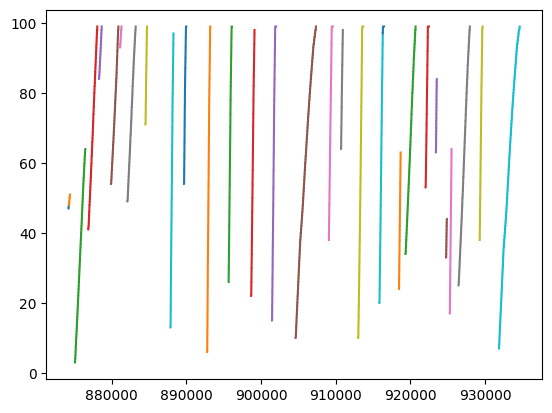

In [193]:
plt.figure()
for i in index_list[0:30]:
    data_i=data.query("c_stat==1 & charg_frag=={}".format(i))
    plt.plot(data_i["soc"])
plt.show()